In [ ]:
!pip install quandl


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import quandl,datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, accuracy_score


In [ ]:
path = "/content/drive/My Drive/bitsproj/CIPLA.NSf.csv"


In [ ]:
df = pd.read_csv(path,parse_dates=True,index_col=0)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-24,529.000000,529.000000,517.049988,518.750000,514.421021,2707033.0
2019-07-25,521.349976,539.200012,519.000000,536.650024,532.171692,3183510.0
2019-07-26,533.200012,539.900024,528.250000,532.099976,527.659607,1371242.0
2019-07-29,531.599976,534.950012,520.250000,522.250000,517.891846,735045.0
2019-07-30,522.200012,533.599976,517.799988,520.000000,515.660583,1665158.0
...,...,...,...,...,...,...
2020-11-17,747.400024,751.900024,734.000000,742.549988,742.549988,7313289.0
2020-11-18,747.299988,752.000000,733.500000,742.950012,742.950012,7190828.0
2020-11-19,742.549988,751.900024,737.950012,742.099976,742.099976,5804230.0


In [ ]:
df = df.dropna()
df1=df
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-24,529.000000,529.000000,517.049988,518.750000,514.421021,2707033.0
2019-07-25,521.349976,539.200012,519.000000,536.650024,532.171692,3183510.0
2019-07-26,533.200012,539.900024,528.250000,532.099976,527.659607,1371242.0
2019-07-29,531.599976,534.950012,520.250000,522.250000,517.891846,735045.0
2019-07-30,522.200012,533.599976,517.799988,520.000000,515.660583,1665158.0
...,...,...,...,...,...,...
2020-11-17,747.400024,751.900024,734.000000,742.549988,742.549988,7313289.0
2020-11-18,747.299988,752.000000,733.500000,742.950012,742.950012,7190828.0
2020-11-19,742.549988,751.900024,737.950012,742.099976,742.099976,5804230.0


In [ ]:
df['High_Low_per'] = (df['High'] - df['Close']) / df['Close']*100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Per_change'] = (df['Open'] - df['Open']) / df['Close']*100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df = df[['Adj Close','High_Low_per','Per_change','Volume']]


In [ ]:
df

,Adj Close,High_Low_per,Per_change,Volume
Date,,,,
2019-07-24,514.421021,1.975904,0.0,2707033.0
2019-07-25,532.171692,0.475168,0.0,3183510.0
2019-07-26,527.659607,1.465899,0.0,1371242.0
2019-07-29,517.891846,2.431788,0.0,735045.0
2019-07-30,515.660583,2.615380,0.0,1665158.0
...,...,...,...,...
2020-11-17,742.549988,1.259179,0.0,7313289.0
2020-11-18,742.950012,1.218115,0.0,7190828.0
2020-11-19,742.099976,1.320583,0.0,5804230.0


In [ ]:
label_col = 'Adj Close'


In [ ]:
forecast_ceil = int(math.ceil(0.01*len(df)))


In [ ]:
df['label'] = df[label_col].shift(-forecast_ceil)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_ceil:]
X_lately = X[-forecast_ceil:]

In [ ]:
df.dropna(inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
y = np.array(df['label'])


In [ ]:
len(X)

325

In [ ]:
len(y)

325

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
clf = svm.SVR(kernel='rbf',epsilon=0.01) 


In [ ]:
clf.fit(X_train, y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
accuracy = clf.score(X_test, y_test) 


In [ ]:
print(accuracy)

0.4833833838442907


In [ ]:
df1

,Open,High,Low,Close,Adj Close,Volume,High_Low_per,Per_change
Date,,,,,,,,
2019-07-24,529.000000,529.000000,517.049988,518.750000,514.421021,2707033.0,1.975904,0.0
2019-07-25,521.349976,539.200012,519.000000,536.650024,532.171692,3183510.0,0.475168,0.0
2019-07-26,533.200012,539.900024,528.250000,532.099976,527.659607,1371242.0,1.465899,0.0
2019-07-29,531.599976,534.950012,520.250000,522.250000,517.891846,735045.0,2.431788,0.0
2019-07-30,522.200012,533.599976,517.799988,520.000000,515.660583,1665158.0,2.615380,0.0
...,...,...,...,...,...,...,...,...
2020-11-17,747.400024,751.900024,734.000000,742.549988,742.549988,7313289.0,1.259179,0.0
2020-11-18,747.299988,752.000000,733.500000,742.950012,742.950012,7190828.0,1.218115,0.0
2020-11-19,742.549988,751.900024,737.950012,742.099976,742.099976,5804230.0,1.320583,0.0


In [ ]:
x1 = df1.drop('Close',axis=1)
y1=df1['Close']

In [ ]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x1, y1, test_size=0.33, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor


rfg = RandomForestRegressor()



In [ ]:
rfg.fit(X_train,y_train)
y_pred = rfg.predict(X_test)


In [ ]:
y_pred[1]




644.4355040800001

In [ ]:
y_test[1]

636.200012

In [ ]:
abs(y_test[1]-y_pred[1])

8.235492080000085

In [ ]:
accuracy = rfg.score(X_test, y_test) 
accuracy

0.9387595473973053

In [ ]:
from sklearn.neural_network import MLPRegressor



mlp = MLPRegressor()


mlp.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
y_pred_1 = mlp.predict(X_test)


In [ ]:
abs(y_test[1] -y_pred_1[1])

607.0678562774268

In [ ]:
accuracy = mlp.score(X_test, y_test) 

In [ ]:
print(accuracy)

-19.473673159231442


In [ ]:
dfx = df1.iloc[0:220,0:1]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
dfx = mm.fit_transform(dfx)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
x_train = dfx[0:219]
y_train = dfx[1:220]

In [ ]:
print(x_train.shape)
print(y_train.shape)

(219, 1)
(219, 1)


In [ ]:
x_train = np.reshape(x_train, (219, 1, 1))


In [ ]:
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
7/7 [==============================] - 0s 2ms/step - loss: 0.7333
Epoch 2/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6996
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6677
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6368
Epoch 5/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6065
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 0.5778
Epoch 7/200
7/7 [==============================] - 0s 2ms/step - loss: 0.5507
Epoch 8/200
7/7 [==============================] - 0s 2ms/step - loss: 0.5242
Epoch 9/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4985
Epoch 10/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4746
Epoch 11/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4517
Epoch 12/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4300
Epoch 13/200
7/7 [==============================] - 0s 2ms/st

In [ ]:
dfy = df1.iloc[220:329,0:1]


In [ ]:
dfy = mm.transform(dfy)

In [ ]:
dfy.shape

(109, 1)

In [ ]:
dfy = np.reshape(dfy, (109, 1, 1))

In [ ]:
predicted_stock_price = model.predict(dfy)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

In [ ]:
dfyreal = df1.iloc[221:330,0:1]
dfyreal.shape

(108, 1)

In [ ]:
dfyreal

,Open
Date,
2020-06-23,674.000000
2020-06-24,660.000000
2020-06-25,632.000000
2020-06-26,639.000000
2020-06-29,637.000000
...,...
2020-11-17,747.400024
2020-11-18,747.299988
2020-11-19,742.549988


In [ ]:
predicted_stock_price


array([[644.0118 ],
       [632.6889 ],
       [623.0893 ],
       [603.1836 ],
       [608.245  ],
       [606.8045 ],
       [614.635  ],
       [610.82635],
       [601.7275 ],
       [618.1641 ],
       [608.9635 ],
       [607.48926],
       [611.4337 ],
       [611.7906 ],
       [608.9635 ],
       [609.6809 ],
       [608.9276 ],
       [604.9251 ],
       [608.9276 ],
       [633.0273 ],
       [642.69904],
       [634.10767],
       [627.3363 ],
       [625.8224 ],
       [632.0114 ],
       [632.6551 ],
       [616.79126],
       [624.8904 ],
       [637.5299 ],
       [641.38116],
       [664.90424],
       [654.9566 ],
       [662.94244],
       [665.48395],
       [673.323  ],
       [686.01   ],
       [707.93835],
       [695.8966 ],
       [689.3272 ],
       [687.1305 ],
       [696.4329 ],
       [692.6504 ],
       [691.5573 ],
       [685.0815 ],
       [690.9263 ],
       [687.68866],
       [683.8944 ],
       [681.18695],
       [680.78534],
       [687.68866],


In [ ]:
dfyreal

,Open
Date,
2020-06-23,674.000000
2020-06-24,660.000000
2020-06-25,632.000000
2020-06-26,639.000000
2020-06-29,637.000000
...,...
2020-11-17,747.400024
2020-11-18,747.299988
2020-11-19,742.549988


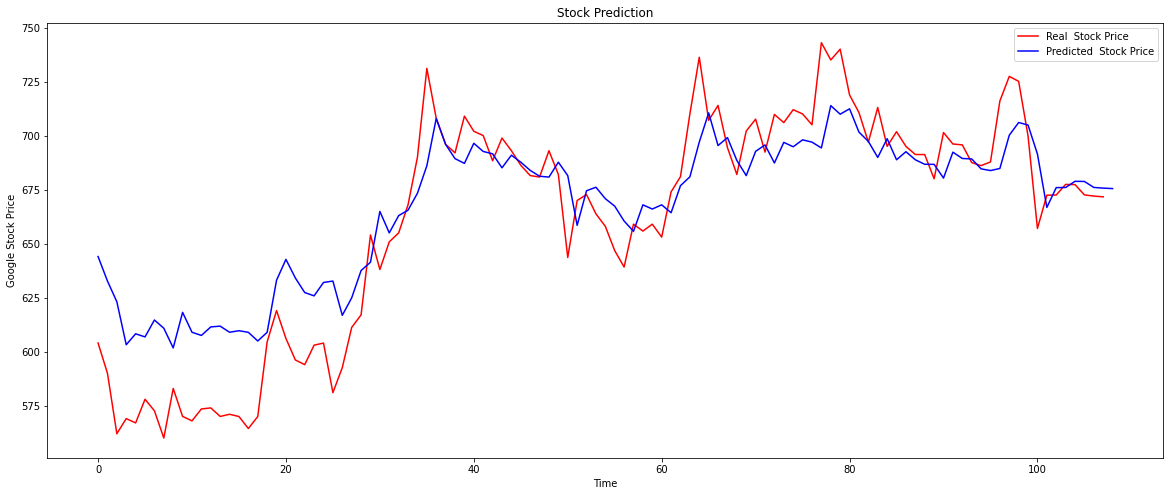

In [ ]:
plt.figure(figsize=(20,8))

plt.plot(dfrt, color = 'red', label = 'Real  Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted  Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
predicted_stock_price=predicted_stock_price[0:108]

In [ ]:
import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(dfrt, predicted_stock_price))

print(rmse)

23.58347483311298
